In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
housing = pd.read_csv('./datasets/housing.csv')
housing.sample(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14294,-117.13,32.72,43.0,2160.0,504.0,1221.0,452.0,2.4821,140600.0,NEAR OCEAN
12566,-121.45,38.54,48.0,3421.0,734.0,1441.0,727.0,1.9485,86600.0,INLAND
15320,-117.35,33.21,24.0,1586.0,262.0,912.0,298.0,4.2500,150300.0,NEAR OCEAN
16397,-121.25,38.00,21.0,446.0,73.0,182.0,57.0,2.8958,135000.0,INLAND
16380,-121.30,38.03,11.0,2866.0,654.0,1404.0,525.0,2.5050,95000.0,INLAND
1513,-122.06,37.91,15.0,5393.0,1422.0,2133.0,1288.0,4.1612,232800.0,NEAR BAY
11134,-117.94,33.85,37.0,588.0,121.0,436.0,104.0,4.2750,186200.0,<1H OCEAN
1730,-122.35,37.98,34.0,3756.0,726.0,2237.0,686.0,3.7562,132900.0,NEAR BAY
10428,-117.64,33.45,26.0,1528.0,NaN,607.0,218.0,6.2871,325500.0,NEAR OCEAN
3165,-118.85,35.20,17.0,2783.0,678.0,2566.0,641.0,1.9907,51200.0,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

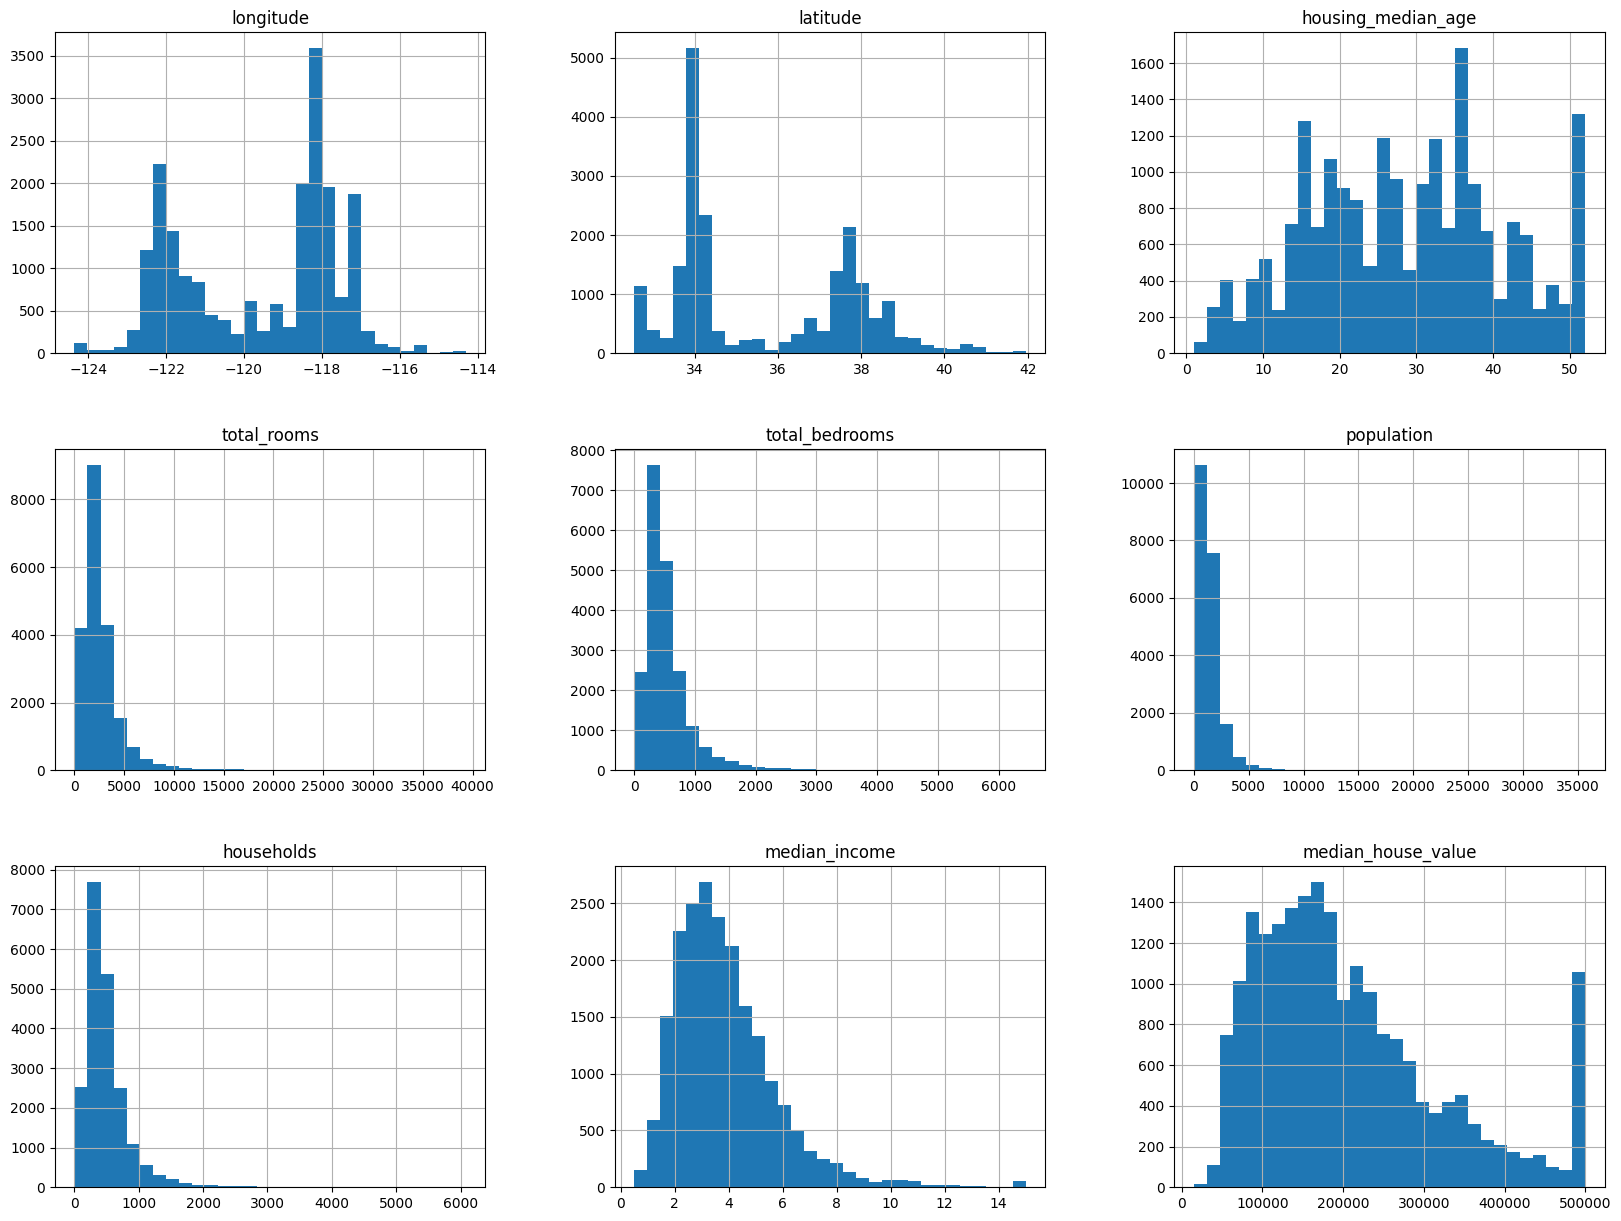

In [6]:
housing.hist(bins  = 30 , figsize = (20,15))

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
def split_train_test(data , test_ratio) : 
   shuffled_indices = np.random.permutation(len(data))
   test_set_size = int(len(data) * test_ratio)
   test_indices = shuffled_indices[:test_set_size]
   train_indices = shuffled_indices[test_set_size:]
   return data.iloc[train_indices] , data.iloc[test_indices]

In [9]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size=0.2 , random_state=42)

In [10]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
print(housing['income_cat'].value_counts())
housing['income_cat'] = np.where(housing['income_cat'] < 6, housing['income_cat'], 6.0)

income_cat
3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: count, dtype: int64


In [11]:
housing['income_cat'].value_counts()

income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    1423
6.0     939
1.0     822
Name: count, dtype: int64

In [12]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=42)

for train_index , test_index in split.split(housing , housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
housing['income_cat'].value_counts()/len(housing)


income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.068944
6.0    0.045494
1.0    0.039826
Name: count, dtype: float64

In [15]:
print(strat_train_set['income_cat'].value_counts()/len(strat_train_set))
print(strat_test_set['income_cat'].value_counts()/len(strat_test_set))

income_cat
3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.068920
6.0    0.045482
1.0    0.039850
Name: count, dtype: float64
income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.069041
6.0    0.045543
1.0    0.039729
Name: count, dtype: float64


In [16]:
strat_train_set.drop(columns='income_cat', axis=1, inplace=True)
strat_test_set.drop(columns='income_cat', axis=1, inplace=True)

# Visualization on training set 

<Axes: xlabel='longitude', ylabel='latitude'>

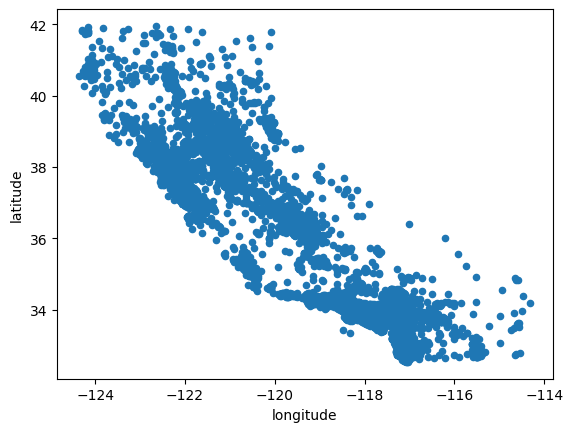

In [17]:
df = strat_train_set.copy()

df.plot(kind = 'scatter' , x = 'longitude' , y = 'latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

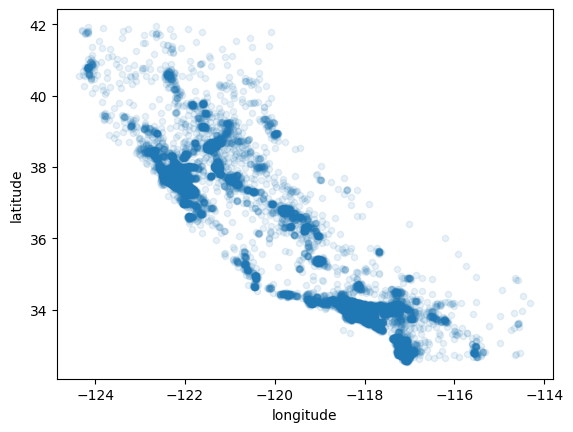

In [18]:
df.plot(kind = 'scatter' , x = 'longitude' , y = 'latitude' , alpha = 0.1 )

<Axes: xlabel='longitude', ylabel='latitude'>

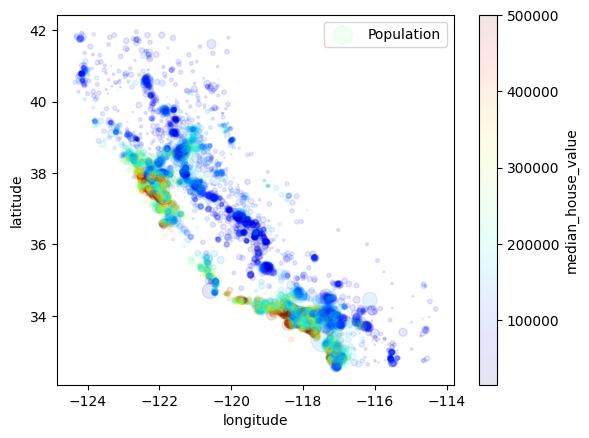

In [19]:
df.plot(kind = 'scatter' , x = 'longitude' , y = 'latitude' , alpha = 0.1  , 
    s = df['population']/100 , label = 'Population' , 
    c = 'median_house_value' , cmap = plt.get_cmap('jet') , colorbar = True        
)

In [20]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924528,-0.107785,0.047801,0.074600,0.106495,0.061007,-0.015011,-0.045270
latitude,-0.924528,1.000000,0.007503,-0.038804,-0.071162,-0.114462,-0.076343,-0.078346,-0.144204
housing_median_age,-0.107785,0.007503,1.000000,-0.364634,-0.324872,-0.299595,-0.306882,-0.115680,0.111570
total_rooms,0.047801,-0.038804,-0.364634,1.000000,0.928754,0.856439,0.917713,0.201676,0.135386
total_bedrooms,0.074600,-0.071162,-0.324872,0.928754,1.000000,0.876627,0.979970,-0.007201,0.048975
population,0.106495,-0.114462,-0.299595,0.856439,0.876627,1.000000,0.905145,0.007156,-0.024114
households,0.061007,-0.076343,-0.306882,0.917713,0.979970,0.905145,1.000000,0.013939,0.066012
median_income,-0.015011,-0.078346,-0.115680,0.201676,-0.007201,0.007156,0.013939,1.000000,0.685600
median_house_value,-0.045270,-0.144204,0.111570,0.135386,0.048975,-0.024114,0.066012,0.685600,1.000000


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

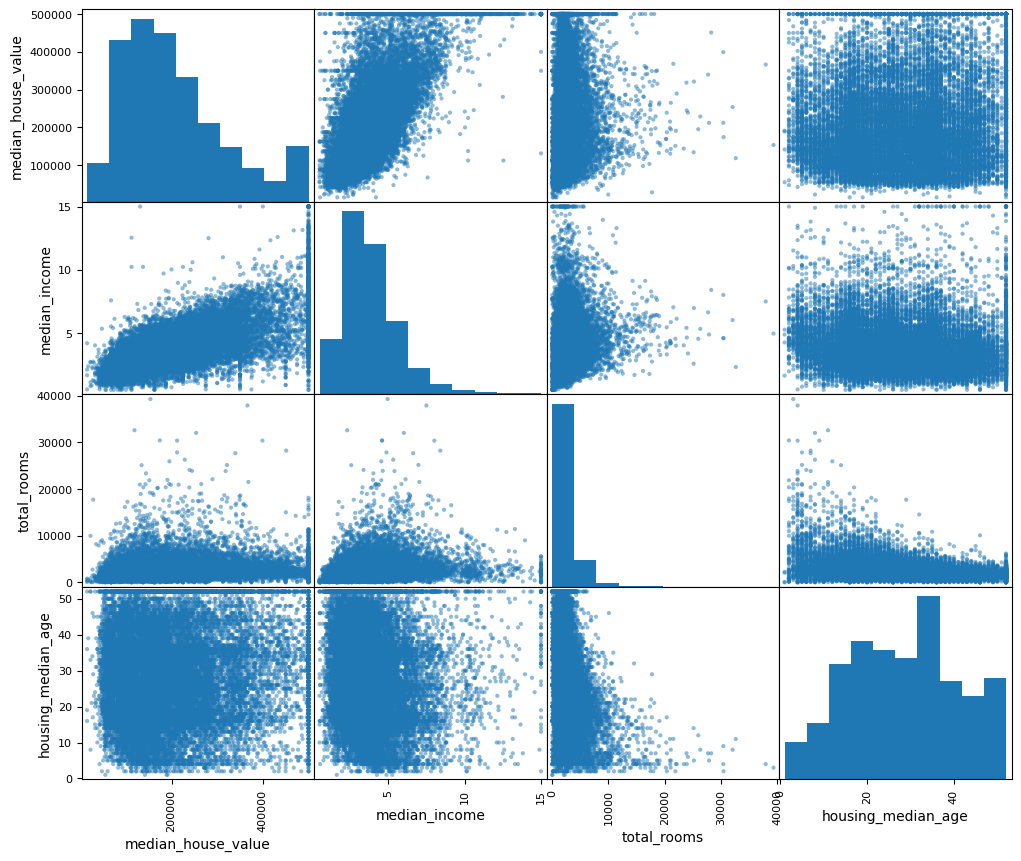

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes] , figsize = (12,10))

<Axes: xlabel='median_income', ylabel='median_house_value'>

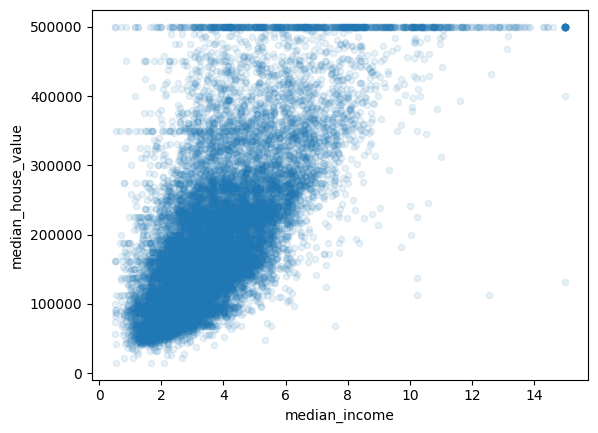

In [22]:
df.plot(kind = 'scatter' , x = 'median_income' , y = 'median_house_value' , alpha = 0.1)

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6895,-118.11,34.04,28.0,3913.0,696.0,2264.0,697.0,5.2446,258000.0,<1H OCEAN
2880,-118.97,35.38,35.0,1673.0,426.0,1041.0,413.0,1.3750,57500.0,INLAND
13769,-117.03,34.07,16.0,3784.0,577.0,1615.0,525.0,4.2333,220300.0,INLAND
18349,-122.17,37.43,24.0,3924.0,1142.0,7174.0,950.0,4.0972,387500.0,NEAR OCEAN
16188,-121.31,37.96,48.0,1112.0,227.0,583.0,216.0,2.3393,77600.0,INLAND


In [24]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

df.corr(numeric_only=True)

#this shows that bedrooms_per_room is mroe correlated with median_house_value than total_bedrooms 
#houses with lower bedroom/room ratio are more expensive negative correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924528,-0.107785,0.047801,0.074600,0.106495,0.061007,-0.015011,-0.045270,-0.026379,0.092487,-0.000422
latitude,-0.924528,1.000000,0.007503,-0.038804,-0.071162,-0.114462,-0.076343,-0.078346,-0.144204,0.106097,-0.114499,0.005408
housing_median_age,-0.107785,0.007503,1.000000,-0.364634,-0.324872,-0.299595,-0.306882,-0.115680,0.111570,-0.148457,0.140324,0.015052
total_rooms,0.047801,-0.038804,-0.364634,1.000000,0.928754,0.856439,0.917713,0.201676,0.135386,0.129225,-0.194467,-0.024490
total_bedrooms,0.074600,-0.071162,-0.324872,0.928754,1.000000,0.876627,0.979970,-0.007201,0.048975,0.002404,0.084130,-0.028310
population,0.106495,-0.114462,-0.299595,0.856439,0.876627,1.000000,0.905145,0.007156,-0.024114,-0.071331,0.033838,0.075881
households,0.061007,-0.076343,-0.306882,0.917713,0.979970,0.905145,1.000000,0.013939,0.066012,-0.080651,0.064297,-0.027362
median_income,-0.015011,-0.078346,-0.115680,0.201676,-0.007201,0.007156,0.013939,1.000000,0.685600,0.308593,-0.624776,0.022497
median_house_value,-0.045270,-0.144204,0.111570,0.135386,0.048975,-0.024114,0.066012,0.685600,1.000000,0.144217,-0.258208,-0.021634
rooms_per_household,-0.026379,0.106097,-0.148457,0.129225,0.002404,-0.071331,-0.080651,0.308593,0.144217,1.000000,-0.398711,-0.005096


In [25]:
# housing = strat_train_set.drop('median_house_value' , axis = 1)
# housing_labels = strat_train_set['median_house_value'].copy()
housing , housing_test , housing_labels , housing_test_labels = train_test_split(housing.drop('median_house_value' , axis = 1) , housing['median_house_value'] , test_size = 0.2 ,random_state = 42)
housing.head()
housing_labels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [26]:
housing['total_bedrooms'].isnull().mean()*100


np.float64(0.0)

<Axes: xlabel='total_bedrooms', ylabel='Count'>

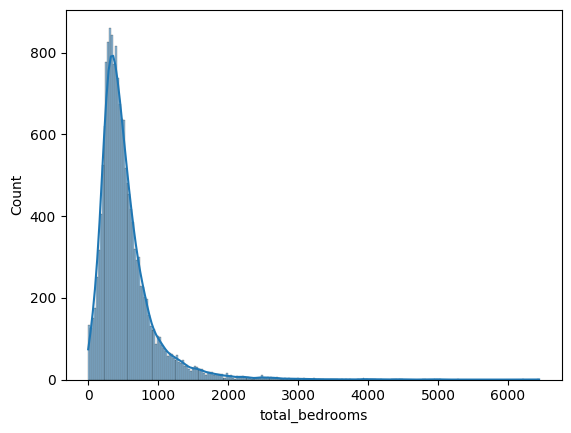

In [27]:
sns.histplot(housing['total_bedrooms'] , kde = True)

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')


housing_num = housing.drop('ocean_proximity' , axis = 1)
imputer.fit(housing_num)

print(imputer.statistics_)

x = imputer.transform(housing_num)
x
housing_tr = pd.DataFrame(x , columns = housing_num.columns )
housing_tr.isnull().sum()

[-118.51     34.26     29.     2129.      437.     1167.      410.
    3.5458    3.    ]


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
income_cat            0
dtype: int64

In [29]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,3.0
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,3.0
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,3.0
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,2.0
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,3.0
...,...,...,...,...,...,...,...,...,...
16507,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,5.0
16508,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,3.0
16509,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,2.0
16510,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,4.0


In [30]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,3.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,3.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,3.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,2.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,3.0
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN,5.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND,3.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN,2.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN,4.0


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(encoder.classes_)
housing_cat_encoded

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


array([4, 4, 4, ..., 0, 0, 3])

In [32]:
housing_cat_encoded.reshape(-1,1)

array([[4],
       [4],
       [4],
       ...,
       [0],
       [0],
       [3]])

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [34]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [35]:
housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5384,-118.40,34.02,27.0,515.0,201.0,397.0,228.0,2.4135,<1H OCEAN,2.0
16501,-121.06,37.86,24.0,1713.0,328.0,1258.0,324.0,2.6830,INLAND,2.0
11021,-117.83,33.83,13.0,3759.0,489.0,1496.0,499.0,8.3818,<1H OCEAN,6.0
18538,-122.01,36.98,27.0,2820.0,730.0,1511.0,745.0,2.5890,NEAR OCEAN,2.0
1948,-120.84,38.77,11.0,1013.0,188.0,410.0,158.0,4.8250,INLAND,4.0
3566,-118.58,34.23,29.0,3907.0,773.0,2037.0,727.0,4.1023,<1H OCEAN,3.0
6036,-117.73,34.06,34.0,344.0,108.0,315.0,119.0,3.1786,INLAND,3.0
5291,-118.42,34.08,46.0,1399.0,148.0,410.0,152.0,15.0001,<1H OCEAN,6.0
11910,-117.41,33.96,24.0,4481.0,901.0,2398.0,823.0,3.8640,INLAND,3.0
18414,-121.84,37.27,9.0,3624.0,812.0,1856.0,721.0,4.2083,<1H OCEAN,3.0


In [36]:
f = np.array([[1,2,3],[4,5,6]])
f = np.c_[f , [7,8]]
f

array([[1, 2, 3, 7],
       [4, 5, 6, 8]])

In [37]:
#Here fit method is for compatibility with sklearn pipelines and it does nothing 

from sklearn.base import BaseEstimator , TransformerMixin

rooms_ix , bedrooms_ix , population_ix , household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator , TransformerMixin) : 
    def __init__(self , add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self , x , y = None) : 
        return self 
    
    def transform(self , x , y = None ): 
        rooms_per_household = x[: , rooms_ix]/x[: , household_ix]
        population_per_household = x[: , population_ix] / x[: , household_ix]

        if self.add_bedrooms_per_room : 
            bedrooms_per_room = x[: , bedrooms_ix] / x[: , rooms_ix]
            return np.c_[x , rooms_per_household , population_per_household , bedrooms_per_room]
        else : 
            return np.c_[x , rooms_per_household , population_per_household]

# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = True)
# housing_extra_attribs = attr_adder.transform(housing.values)
# print(housing_extra_attribs.shape)
# print(housing.shape)
# housing_extra_attribs

In [38]:
#scaling 
print(housing['total_bedrooms'].describe())
print(housing['median_income'].describe())

count    16512.000000
mean       538.496851
std        419.007096
min          1.000000
25%        296.750000
50%        437.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64
count    16512.000000
mean         3.880754
std          1.904294
min          0.499900
25%          2.566700
50%          3.545800
75%          4.773175
max         15.000100
Name: median_income, dtype: float64


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy='median')) , 
    ('attributes_adder' , CombinedAttributesAdder()) ,
    ('std_scaler' , StandardScaler())
])

housing_num_transformed = num_pipeline.fit_transform(housing_num)
new_columns = housing_num.columns.tolist() + ['rooms_per_household' , 'population_per_household', 'bedrooms_per_room']

housing_num_transformed_df = pd.DataFrame(housing_num_transformed , columns = new_columns)
print(housing_num.shape)
print(housing_num.columns)
print(housing_num_transformed_df.head())
print(num_pipeline)

(16512, 9)
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'income_cat'],
      dtype='object')
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1.272587 -1.372811            0.348490     0.222569        0.211228   
1   0.709162 -0.876696            1.618118     0.340293        0.593094   
2  -0.447603 -0.460146           -1.952710    -0.342597       -0.495226   
3   1.232698 -1.382172            0.586545    -0.561490       -0.409306   
4  -0.108551  0.532084            1.142008    -0.119565       -0.256559   

   population  households  median_income  income_cat  rooms_per_household  \
0    0.768276    0.322906      -0.326196   -0.050643            -0.174916   
1   -0.098901    0.672027      -0.035843   -0.050643            -0.402835   
2   -0.449818   -0.430461       0.144701   -0.050643             0.088216   
3   -0.007434   -0.380587      -1.017864   -0.9

In [40]:
from sklearn.base import BaseEstimator , TransformerMixin

class DataFrameSelector(BaseEstimator , TransformerMixin) : 
    def __init__(self , attribute_names) : 
        self.attribute_names = attribute_names 
    def fit(self , x, y = None) : 
        return self 
    
    def transform(self , x) : 
        return x[self.attribute_names].values

In [41]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

num_attributes = housing_num.columns.tolist()
cat_attributes = ['ocean_proximity']

num_pipeline = Pipeline(steps=[
    ('selector' , DataFrameSelector(num_attributes)) , 
    ('SimpleImputer' , SimpleImputer(strategy='median')) , 
    ('attributes_adder' , CombinedAttributesAdder()) , 
    ('StandardScaler' , StandardScaler())
])

cat_pipeline = Pipeline(steps = [
    ('selector' , DataFrameSelector(cat_attributes)) , 
    ('OneHotEncoder' , OneHotEncoder(sparse_output=False))
])

full_pipeline = FeatureUnion(transformer_list= [
    ("num_pipeline" , num_pipeline) 	,
    ("cat_pipeline", cat_pipeline)
])

In [42]:
from sklearn import set_config
set_config(display='diagram')

full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelector(attribute_names=['longitude',
                                                                                    'latitude',
                                                                                    'housing_median_age',
                                                                                    'total_rooms',
                                                                                    'total_bedrooms',
                                                                                    'population',
                                                                                    'households',
                                                                                    'median_income',
                                                                                    'income_cat'])),
                                                ('SimpleImputer',
                                                 SimpleImputer(strategy='median')),
                                                ('attributes_adder',
                                                 CombinedAttributesAdder()),
                                                ('StandardScaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelector(attribute_names=['ocean_proximity'])),
                                                ('OneHotEncoder',
                                                 OneHotEncoder(sparse_output=False))]))])

In [43]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_test_prepared = full_pipeline.fit_transform(housing_test)
housing_test_prepared

array([[ 0.25541734,  0.22194113, -0.30073951, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02976613, -0.20947715,  0.098724  , ...,  0.        ,
         0.        ,  0.        ],
       [-1.46454628,  1.03788441,  1.85636346, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.2689819 ,  0.80810728, -0.30073951, ...,  0.        ,
         0.        ,  0.        ],
       [-0.120668  ,  0.5548835 ,  0.57808022, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57634349, -0.64089543, -0.93988113, ...,  0.        ,
         0.        ,  0.        ]])

In [44]:
housing_labels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared , housing_labels)

model_pred = lin_reg.predict(housing_test_prepared)
print(model_pred.shape)
print(housing_test_labels.shape)


(4128,)
(4128,)


In [46]:
from sklearn.metrics import r2_score
r2_score(housing_test_labels , model_pred)

0.6129193320940001

In [47]:
from sklearn.metrics import mean_squared_error as mse_loss
loss = np.sqrt(mse_loss(housing_test_labels , model_pred))
loss

np.float64(71220.36103022129)

In [48]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(housing_prepared , housing_labels)

model_pred = tree.predict(housing_test_prepared)
loss = np.sqrt(mse_loss(housing_test_labels, model_pred))
loss

np.float64(115851.37551548301)

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier() , housing_prepared , housing_labels, cv = 10 , scoring = 'neg_mean_squared_error') 

c:\Users\Sachin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


array([-6.01573635e+09, -6.47439791e+09, -7.24570914e+09, -6.52346705e+09,
       -6.49650480e+09, -6.93774782e+09, -5.85244492e+09, -5.84984210e+09,
       -6.88508568e+09, -6.32204161e+09])